In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os


In [2]:
catalog_lunar_dir = "../data/lunar/data/training/catalogs/apollo12_catalog_GradeA_final.csv"

catalog_lunar = pd.read_csv(catalog_lunar_dir)

catalog_lunar

row_num = 45

In [3]:
catalog_lunar.columns
row = catalog_lunar.iloc[25]
arrival_time = datetime.strptime(row["time_abs(%Y-%m-%dT%H:%M:%S.%f)"], '%Y-%m-%dT%H:%M:%S.%f')
arrival_time_relative = row["time_rel(sec)"]
test_filename = row.filename
data_dir = "../data/lunar/data/training/data/S12_GradeA/"
csv_file = f'{data_dir}{test_filename}.csv'
raw_data = pd.read_csv(csv_file)
raw_data

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1971-05-23T00:00:00.502000,0.000000,-5.969867e-16
1,1971-05-23T00:00:00.652943,0.150943,-7.427009e-16
2,1971-05-23T00:00:00.803887,0.301887,-8.060615e-16
3,1971-05-23T00:00:00.954830,0.452830,-7.803532e-16
4,1971-05-23T00:00:01.105774,0.603774,-6.963062e-16
...,...,...,...
572418,1971-05-24T00:00:03.218981,86402.716981,-4.812401e-17
572419,1971-05-24T00:00:03.369925,86402.867925,-8.932048e-17
572420,1971-05-24T00:00:03.520868,86403.018868,-1.556289e-16
572421,1971-05-24T00:00:03.671811,86403.169811,-2.886215e-16


In [4]:
chunk_size = 20000
total_rows = raw_data.shape[0]
total_rows

results_df = pd.DataFrame(columns=["chunk", "label"])
results_df

,chunk,label


In [5]:
for start in range(0, total_rows, chunk_size):
    end = start + chunk_size

    chunk = raw_data.iloc[start:end]
    # print(chunk)

    data_df = pd.DataFrame(chunk["time_rel(sec)"])
   
    if arrival_time_relative < data_df["time_rel(sec)"].values.max() and arrival_time_relative > data_df["time_rel(sec)"].values.min():
        new_row = pd.DataFrame({"chunk": [chunk], "label": [1]})
        # print(new_row)
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    else:
        new_row = pd.DataFrame({"chunk": [chunk], "label": [0]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)




results_df

,chunk,label
0,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_rel...,0
1,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_rel...,0
2,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_rel...,0
3,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_rel...,0
4,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_rel...,0
5,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
6,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
7,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
8,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
9,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0


In [6]:
label_counts = results_df["label"].value_counts()

count_label_1 = label_counts.get(1, 0)

count_label_1

1

In [7]:
results_df.iloc[0]["chunk"]

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1971-05-23T00:00:00.502000,0.000000,-5.969867e-16
1,1971-05-23T00:00:00.652943,0.150943,-7.427009e-16
2,1971-05-23T00:00:00.803887,0.301887,-8.060615e-16
3,1971-05-23T00:00:00.954830,0.452830,-7.803532e-16
4,1971-05-23T00:00:01.105774,0.603774,-6.963062e-16
...,...,...,...
19995,1971-05-23T00:50:18.615208,3018.113208,8.455475e-11
19996,1971-05-23T00:50:18.766151,3018.264151,-2.648317e-11
19997,1971-05-23T00:50:18.917094,3018.415094,-1.339682e-10
19998,1971-05-23T00:50:19.068038,3018.566038,-2.005362e-10


In [8]:
type(results_df.iloc[0]["chunk"].iloc[2]["velocity(m/s)"])

numpy.float64

In [9]:
results_df.to_csv("chunked_data.csv", index=False)

In [10]:
results_df.to_excel("chunked_data.xlsx")

Function to Categorize

In [11]:
catalog_lunar_dir = "../data/lunar/data/training/catalogs/apollo12_catalog_GradeA_final.csv"
data_dir = "../data/lunar/data/training/data/Processed/"
row_num = row_num

def process_lunar_data(catalog_path, data_dir, row_num, chunk_size):
    # Read the catalog file
    catalog_lunar = pd.read_csv(catalog_path)

    # Extract row and relevant data
    row = catalog_lunar.iloc[row_num]
    arrival_time = datetime.strptime(row["time_abs(%Y-%m-%dT%H:%M:%S.%f)"], '%Y-%m-%dT%H:%M:%S.%f')
    arrival_time_relative = row["time_rel(sec)"]
    test_filename = row.filename

    # Read the associated CSV file containing raw data
    csv_file = f'{data_dir}/{test_filename}.csv'
    raw_data = pd.read_csv(csv_file)

    # Initialize the results dataframe
    total_rows = raw_data.shape[0]
    results_df = pd.DataFrame(columns=["chunk", "label"])

    # Iterate over chunks of data
    start = 0
    while start < total_rows:
        end = min(start + chunk_size, total_rows)  # Handle case where we don't have a full chunk at the end
        chunk = raw_data.iloc[start:end]
        data_df = pd.DataFrame(chunk["time_rel(sec)"])

        # Check if arrival time is within the current chunk
        if arrival_time_relative >= data_df["time_rel(sec)"].values.min() and arrival_time_relative <= data_df["time_rel(sec)"].values.max():
            # Split chunk at the arrival_time_relative
            before_arrival = chunk[data_df["time_rel(sec)"] < arrival_time_relative]
            after_arrival = chunk[data_df["time_rel(sec)"] >= arrival_time_relative]

            # Add the part before arrival_time_relative with label 0
            if not before_arrival.empty:
                results_df = pd.concat([results_df, pd.DataFrame({"chunk": [before_arrival], "label": [0]})], ignore_index=True)

            # Add a chunk starting from the arrival_time_relative, ensure it has chunk_size rows
            after_start = after_arrival.index[0]  # Start from the first row after the arrival time
            after_end = min(after_start + chunk_size, total_rows)  # Ensure the chunk has exactly chunk_size rows
            after_chunk = raw_data.iloc[after_start:after_end]

            results_df = pd.concat([results_df, pd.DataFrame({"chunk": [after_chunk], "label": [1]})], ignore_index=True)

            # Move the start index beyond this chunk (chunk_size after the arrival time)
            start = after_end
        else:
            # If no arrival time in this chunk, label the entire chunk as 0
            results_df = pd.concat([results_df, pd.DataFrame({"chunk": [chunk], "label": [0]})], ignore_index=True)
            start += chunk_size  # Move to the next chunk

    # If there are remaining rows less than the chunk size, add them with the appropriate label
    if start < total_rows:
        remaining_chunk = raw_data.iloc[start:total_rows]
        remaining_label = 1 if arrival_time_relative >= remaining_chunk["time_rel(sec)"].values.min() else 0
        results_df = pd.concat([results_df, pd.DataFrame({"chunk": [remaining_chunk], "label": [remaining_label]})], ignore_index=True)

    return results_df

# def process_lunar_data(catalog_path, data_dir, row_num, chunk_size):
#     # Read the catalog file
#     catalog_lunar = pd.read_csv(catalog_path)

#     # Extract row and relevant data
#     row = catalog_lunar.iloc[row_num]
#     arrival_time = datetime.strptime(row["time_abs(%Y-%m-%dT%H:%M:%S.%f)"], '%Y-%m-%dT%H:%M:%S.%f')
#     arrival_time_relative = row["time_rel(sec)"]
#     test_filename = row.filename

#     # Read the associated CSV file containing raw data
#     csv_file = f'{data_dir}/{test_filename}.csv'
#     raw_data = pd.read_csv(csv_file)

#     # Initialize the results dataframe
#     total_rows = raw_data.shape[0]
#     results_df = pd.DataFrame(columns=["chunk", "label"])

#     # Iterate over chunks of data
#     for start in range(0, total_rows, chunk_size):
#         end = start + chunk_size
#         chunk = raw_data.iloc[start:end]
#         data_df = pd.DataFrame(chunk["time_rel(sec)"])

#         # Check if arrival time is within the current chunk
#         if arrival_time_relative < data_df["time_rel(sec)"].values.max() and arrival_time_relative > data_df["time_rel(sec)"].values.min():
#             new_row = pd.DataFrame({"chunk": [chunk], "label": [1]})
#         else:
#             new_row = pd.DataFrame({"chunk": [chunk], "label": [0]})
        
#         results_df = pd.concat([results_df, new_row], ignore_index=True)

#     return results_df

processed_chunks = process_lunar_data(catalog_lunar_dir, data_dir, row_num, chunk_size)

In [12]:
processed_chunks

,chunk,label
0,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
1,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
2,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
3,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
4,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_re...,0
5,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_r...,0
6,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_r...,0
7,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_r...,0
8,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_r...,0
9,time_abs(%Y-%m-%dT%H:%M:%S.%f) time_r...,0


In [13]:
quake_row = processed_chunks.loc[processed_chunks["label"] == 1]
quake_row["chunk"]

10            time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_r...
Name: chunk, dtype: object

In [14]:
extracted_quake_chunk = quake_row["chunk"].values[0]
extracted_quake_chunk

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
191198,1973,28860.075472,0.000000e+00
191199,1973,28860.226415,0.000000e+00
191200,1973,28860.377358,0.000000e+00
191201,1973,28860.528302,0.000000e+00
191202,1973,28860.679245,0.000000e+00
...,...,...,...
211193,1973,31878.188679,0.000000e+00
211194,1973,31878.339623,-1.102751e-09
211195,1973,31878.490566,-3.010070e-09
211196,1973,31878.641509,-3.913162e-09


In [15]:
type(extracted_quake_chunk)

pandas.core.frame.DataFrame

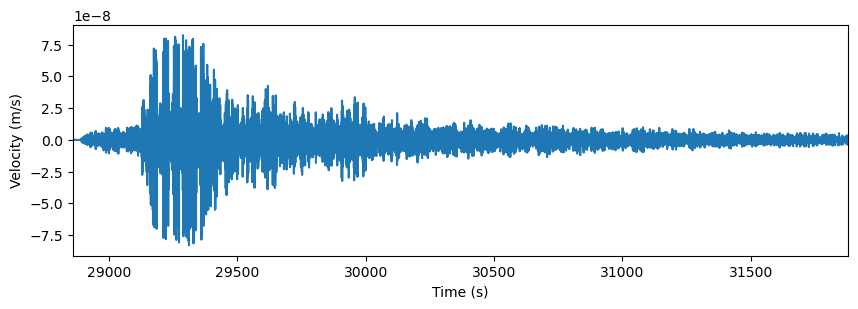

In [16]:
def plot_chunk(chunk):
    csv_times = np.array(chunk["time_rel(sec)"].tolist())
    csv_velocities = np.array(chunk["velocity(m/s)"].tolist())

    # Plot the trace!
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(csv_times,csv_velocities)
    # Make the plot pretty
    ax.set_xlim([min(csv_times),max(csv_times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')

plot_chunk(extracted_quake_chunk)